# Youtube Sentimental Analysis
## Made By Group 6
- Saransh Shukla saransh21csu461@ncuindia.edu
- Ashutosh Gairola ashutoshgairola2003@gmail.com
- Vansh Nath nathvansh444@gmail.com
- Mohit Sharma sharma637383@gmail.com
- Vinayak Vats vinayakvats8@gmail.com
- Hemang Mishra hemang2mishra@gmail.com

## Important Instruction 
### Do not disturb the screen or the program for any good reason, else the analysis may fail

Paste the youtube link only and if needed use any of the links below  

https://youtu.be/KbjSuMyTjG4 

https://youtu.be/iyI-defCTa0 

https://youtu.be/ArRqeBKBsEU 

# 1. Install and Import Dependencies

This code snippet imports the required libraries for working with the Transformers library, which is commonly used for natural language processing tasks. The AutoTokenizer class is used for tokenizing text data, and the AutoModelForSequenceClassification class is used for sequence classification tasks using pre-trained models. The torch library is also imported, which is the backbone for working with tensors and deep learning in PyTorch.

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# 2. Instantiate Model

In these lines of code, a pre-trained tokenizer and model are being loaded from the Hugging Face Transformers library. Specifically, the AutoTokenizer.from_pretrained() method is used to load a tokenizer, and the AutoModelForSequenceClassification.from_pretrained() method is used to load a pre-trained model. The model being loaded here is specifically designed for sentiment analysis tasks and is based on the BERT architecture. The tokenizer and model are associated with the 'nlptown/bert-base-multilingual-uncased-sentiment' model name, which indicates a BERT model that has been pre-trained for sentiment analysis on multilingual, uncased text.

In [1]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

NameError: name 'AutoTokenizer' is not defined

# 3. Encode and Calculate Sentiment

In this code, the tokenizer.encode() method is used to tokenize a given text. The text 'It was good but could\'ve been better. Great' is provided as input to the tokenizer. The return_tensors='pt' argument specifies that the output should be returned as PyTorch tensors.

Tokenization involves breaking down the input text into smaller units, typically words or subwords, and representing them as numerical IDs. These tokens are what the model actually processes. The resulting tensor tokens contains the tokenized representation of the input text.

In [3]:
# A test case to illustrate that the model is working correctly
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')

In this code, the tokenized input (tokens) is passed through the pre-trained model (model) using the model's forward pass. This means that the input is processed through the layers of the model to produce an output.

In [4]:
result = model(tokens)

In this code, the variable logits is assigned the value of the logits attribute from the result obtained by passing the tokenized input through the loaded model. The term "logits" generally refers to the raw scores or unnormalized predictions produced by the model before applying any activation functions or probabilities.

In [5]:
result.logits

tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward0>)

In this code, the torch.argmax() function is used to find the index of the element with the highest value within the logits tensor obtained from the model's output. This index corresponds to the class label that the model predicts as the most likely sentiment.

Adding 1 to the index is done because class labels are often represented with a 1-based indexing (i.e., starting from 1). The variable predicted_sentiment is assigned this predicted sentiment class label.

In [6]:
int(torch.argmax(result.logits))+1

4

# 4. Collect Reviews

In [7]:
# video_url variable taking input from user and no. of max comments to be scraped
video_url = input("Enter the youtube video url: ")

In this code snippet, the necessary libraries for web scraping using Selenium are imported. Selenium is a popular automation tool for controlling web browsers through programs. It's commonly used for tasks like web testing, interaction with web elements, and web scraping. Let's break down each import:

from selenium import webdriver: This imports the webdriver module, which provides the interface to interact with a web browser. You can use it to open web pages, perform actions like clicking buttons, and extract information from web elements.

from selenium.webdriver.common.by import By: This imports the By class, which is used to specify the method for locating elements on a web page. It provides various methods like By.ID, By.CLASS_NAME, By.XPATH, etc., to locate elements based on different attributes.

import time: This imports the time module, which allows you to introduce delays in your script. This can be useful when interacting with web pages to give them time to load or perform actions before proceeding.

Overall, these imports set up the environment for web scraping using the Selenium library.

In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

This code defines a function scroll_by_amount that allows you to scroll a web page vertically by a specified amount of pixels using JavaScript. Here's what the function does:

def scroll_by_amount(driver, pixels):: This defines a function named scroll_by_amount that takes two arguments: driver (a Selenium WebDriver instance) and pixels (an integer representing the number of pixels to scroll by).

Inside the function, a JavaScript scroll script is created using an f-string: scroll_script = f"window.scrollBy(0, {pixels});". This script uses the window.scrollBy() method to scroll the web page vertically. The first argument (0) indicates horizontal scrolling (no horizontal scrolling is applied), and the second argument (pixels) indicates the vertical distance to scroll by.

Finally, the execute_script() method of the WebDriver instance (driver) is used to execute the scroll script: driver.execute_script(scroll_script). This causes the web page to be scrolled by the specified number of pixels.

In [9]:
def scroll_by_amount(driver, pixels):
    scroll_script = f"window.scrollBy(0, {pixels});"
    driver.execute_script(scroll_script)

This code defines a function scroll_by_amount that allows you to scroll a web page vertically by a specified amount of pixels using JavaScript. Here's what the function does:

def scroll_by_amount(driver, pixels):: This defines a function named scroll_by_amount that takes two arguments: driver (a Selenium WebDriver instance) and pixels (an integer representing the number of pixels to scroll by).

Inside the function, a JavaScript scroll script is created using an f-string: scroll_script = f"window.scrollBy(0, {pixels});". This script uses the window.scrollBy() method to scroll the web page vertically. The first argument (0) indicates horizontal scrolling (no horizontal scrolling is applied), and the second argument (pixels) indicates the vertical distance to scroll by.

Finally, the execute_script() method of the WebDriver instance (driver) is used to execute the scroll script: driver.execute_script(scroll_script). This causes the web page to be scrolled by the specified number of pixels.

In [10]:
def read_comments_from_yt(driver, list_comments):
    # Extract comments and commenters' names
    comments = []
    comment_elements = driver.find_elements(By.CSS_SELECTOR, 'yt-formatted-string#content-text')
    for comment_element in comment_elements:
        comment_text = comment_element.text
        comment = comment_text.replace("\n", " ")
        comments.append(comment)

    commenters_names = []
    commenter_elements = driver.find_elements(By.CSS_SELECTOR, 'a#author-text')
    for commenter_element in commenter_elements:
        commenter_name = commenter_element.text
        commenters_names.append(commenter_name)
    list_comments.extend(list(zip(commenters_names, comments)))

    return list_comments

This code defines a function read_more_button that is designed to click on "Read More" buttons on a web page to expand content. Here's how the function works:

def read_more_button(driver):: This defines a function named read_more_button that takes one argument: driver (a Selenium WebDriver instance).

Inside the function, the driver.find_elements() method is used to locate all elements with the XPath '//tp-yt-paper-button[@id="more"]'. This XPath expression targets "Read More" buttons that have the attribute id set to "more". The located buttons are stored in the read_more_buttons list.

A for loop iterates over each button in the read_more_buttons list.

Inside the loop, the try block attempts to click on the current button using the button.click() method. Clicking on the "Read More" button is an attempt to expand or reveal hidden content on the web page.

After clicking the button, there's a time.sleep(1) statement to introduce a 1-second delay. This is to give time for comments or content to load after clicking the button. The time module is being used here to provide the delay.

If any exceptions occur while trying to click the button (e.g., if the button is not clickable or if an error occurs), the except block catches the exception and does nothing (pass).

This function is useful for scenarios where you want to expand content that is initially hidden behind "Read More" buttons on a web page.

In [11]:
def read_more_button(driver):
    read_more_buttons = driver.find_elements(By.XPATH, '//tp-yt-paper-button[@id="more"]')
    for button in read_more_buttons:
        try:
            button.click()
            time.sleep(1)  # Give time for comments to load after clicking
        except:
            pass  # Ignore any exceptions thrown by clicking the button

This function is designed to scrape comments from a YouTube video using Selenium. Here's how the function works:

def get_youtube_comments(video_url, max_comments=200):: This defines a function named get_youtube_comments that takes two arguments: video_url (the URL of the YouTube video) and max_comments (the maximum number of comments to scrape, with a default value of 200).

A Chrome WebDriver is initialized using webdriver.Chrome(). You might need to specify the path to your ChromeDriver executable if needed. The driver.get(video_url) line opens the specified YouTube video URL.

A 5-second delay is introduced using time.sleep(5) to allow the page to load.

max_comments is incremented by 1 to accommodate the list_comments slicing later on.

A loop runs indefinitely (breaking based on conditions) to scroll down the page and load comments. The variable scroll_amount controls the amount of vertical scrolling.

Inside the loop, the scroll_by_amount function scrolls the page, and then a 2-second delay is introduced to allow content to load.

The variable new_height stores the updated height of the page after scrolling.

The number of loaded comments in the current scroll is calculated using new_comments_loaded. This is obtained by finding elements with a specific CSS selector ('yt-formatted-string#content-text'), which corresponds to comment content.

The read_more_button function is called to click on "Read more" buttons and reveal full comments. The read_comments_from_yt function (not provided) is used to read the comments and append them to the list_comments list.

The loop checks whether the number of comments loaded is the same as in the previous scroll (new_comments_loaded == pre_comments_loaded) or if the number of loaded comments exceeds the maximum allowed comments (new_comments_loaded > max_comments). If either condition is met, the loop is broken.

The variable pre_comments_loaded is updated with the number of comments loaded before scrolling again.

After exiting the loop, the WebDriver is closed using driver.quit().

The list_comments list is sliced to include comments from index 1 up to max_comments.

The function returns the list_comments containing the scraped comments.

In [12]:
def get_youtube_comments(video_url, max_comments=200):
    driver = webdriver.Chrome()  # Change to the path of your ChromeDriver executable if needed
    driver.get(video_url)
    time.sleep(5)  # Allow time for the page to load
    max_comments+=1

    list_comments = []
    # Scroll down by a specific amount
    scroll_amount = 625  # Adjust this value as needed
    pre_comments_loaded = new_comments_loaded =0

    while True:
        scroll_by_amount(driver, scroll_amount)
        time.sleep(2)  # Add a small delay to allow content to load
        new_height = driver.execute_script("return document.body.scrollHeight")
        
        # Calculate the number of comments loaded in this scroll
        new_comments_loaded += len(driver.find_elements(By.CSS_SELECTOR, 'yt-formatted-string#content-text'))
        # print(new_comments_loaded, pre_comments_loaded, max_comments)

        read_more_button(driver)  # Click all "Read more" buttons to load full comments
        list_comments = read_comments_from_yt(driver, list_comments)  # Read the comments and append to list

        if new_comments_loaded == pre_comments_loaded or new_comments_loaded > max_comments:
            break
        pre_comments_loaded = new_comments_loaded # Update the number of loaded comments before scrolling
        
    driver.quit()

    list_comments = list_comments[1:max_comments]
    return list_comments


get_youtube_comments function to scrape comments from a YouTube video. The len(comments) line is used to print the number of comments that were scraped from the YouTube video using the get_youtube_comments function. It will output the count of comments that were stored in the comments list after scraping.

In [13]:
comments = get_youtube_comments(video_url)
print(len(comments))

200


In [14]:
for commenter, comment in comments:
    print(f"Commenter: {commenter}\nComment: {comment}\n")

Commenter: @bosefoundation
Comment: Purchased the movie. Fell in love with the concept. Fell in love with Nolan.

Commenter: @mohanmuralidharangangadhar9202
Comment: Who don't purchased the premium and came for just read the comments like here ️

Commenter: @anwzdewan6969
Comment: This movie was inspired from an anime called "Paprika" but Christopher Nolan outdid himself and made it better than the original. He deserves the fame he has.

Commenter: @youtubechannel1363
Comment: 

Commenter: @ashishkhetpal
Comment: Bought on rent with google's own money that he paid me for rewards...Each penny was worth it.  Mind-blowing   Christopher Nolan is the best director this generation had.  Now off to his another epic   Oppenheimer.

Commenter: @priyasingh9.940
Comment: Beautiful

Commenter: @ankushkr630
Comment: Paisa ni hai dekhne ke liye 

Commenter: @7normalboysfromsouthkorea740
Comment: This is suga's favourite movie 

Commenter: @shahwezkhan4984
Comment: Love this movie

Commenter: @vswapa

# 5. Load Reviews into DataFrame and Score

import seaborn as sns: This imports the seaborn library, which is a popular data visualization library built on top of matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. It's often used to create visually appealing visualizations with minimal code.

import pandas as pd: This imports the pandas library and assigns it the alias pd. pandas is a widely used library for data manipulation and analysis in Python. It provides data structures like DataFrames and Series, as well as various functions and methods for data cleaning, transformation, aggregation, and more.

In [15]:
import seaborn as sns
import pandas as pd

df: This line initializes a DataFrame named df using the pandas library.

pd.DataFrame(comments, columns=['user', 'comment']): This line creates a DataFrame from the comments list that you obtained by scraping YouTube comments. The comments list is used as the data source for the DataFrame. The columns parameter is used to specify the column names for the DataFrame. In this case, you're specifying two columns: 'user' and 'comment'.

In [16]:
df = pd.DataFrame(comments, columns=['user','comment'])

In [17]:
df

,user,comment
0,@bosefoundation,Purchased the movie. Fell in love with the con...
1,@mohanmuralidharangangadhar9202,Who don't purchased the premium and came for j...
2,@anwzdewan6969,"This movie was inspired from an anime called ""..."
3,@youtubechannel1363,
4,@ashishkhetpal,Bought on rent with google's own money that he...
...,...,...
195,@jahaapana,from worm holes to atomic bombs.... I mean.......
196,@crazyboys6773,Wow wow wow
197,@Xunoh,I keep coming back
198,@saurabh-ny8cn,


The code df['comment'].iloc[0] is used to retrieve the comment from the first row of the 'comment' column in the DataFrame df.

In [18]:
df['comment'].iloc[0]

'Purchased the movie. Fell in love with the concept. Fell in love with Nolan.'

def sentiment_score(comment):: This line defines a function named sentiment_score that takes a single argument comment, which is the text of the comment for which you want to calculate the sentiment score.

Inside the function, tokenizer.encode(comment, return_tensors='pt') tokenizes the input comment using the loaded tokenizer. The return_tensors='pt' argument specifies that the output should be returned as PyTorch tensors.

The tokenized input is then passed through the loaded sentiment analysis model using model(tokens). The result is stored in the result variable.

int(torch.argmax(result.logits)) + 1 extracts the sentiment prediction from the model's output logits using torch.argmax() to find the index of the maximum value. Adding 1 is done to convert the 0-based indexing to a 1-based sentiment score.

The sentiment score is returned by the function.

In [19]:
def sentiment_score(comment):
    tokens = tokenizer.encode(comment, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

df['comment']: This part accesses the 'comment' column of the DataFrame df.

.apply(lambda x: sentiment_score(x[:512])): This part applies a function to each element of the 'comment' column. The function passed here is a lambda function that takes each comment x and calculates the sentiment score using the sentiment_score function. The comment is truncated to the first 512 characters using x[:512] before passing it to the sentiment_score function.

The calculated sentiment scores are then assigned to a new column named 'sentiment score' in the DataFrame.

As a result, each row in the DataFrame will now have a corresponding sentiment score in the 'sentiment score' column, indicating the sentiment score calculated for the comment in that row.

In [20]:
df['sentiment score'] = df['comment'].apply(lambda x: sentiment_score(x[:512]))

df.mean(): This line calculates the mean of all columns in the DataFrame df. By default, it calculates the mean for all numeric columns.

numeric_only=True: This parameter restricts the calculation to only numeric columns. Non-numeric columns (like string columns) will be excluded from the calculation.

In [21]:
df.mean(numeric_only=True)

sentiment score    3.47
dtype: float64

sns.countplot(): This is a function from the seaborn library that creates a count plot. A count plot is used to show the counts of observations in each categorical bin.

x='sentiment score': This parameter specifies that the x-axis of the count plot will be based on the 'sentiment score' column in the DataFrame df.

data=df: This parameter specifies the DataFrame df as the data source for the plot.

<Axes: xlabel='sentiment score', ylabel='count'>

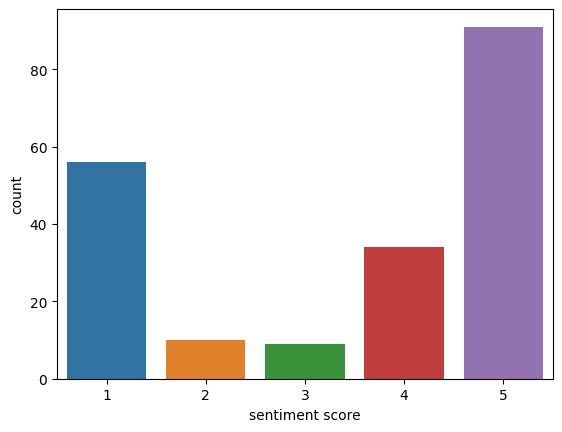

In [22]:
sns.countplot(x='sentiment score', data=df)